In [22]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from dateutil import parser
%matplotlib inline

df=pd.read_csv("data/healthy_person1.csv",header=None,date_parser=True)
df.columns=['time','value']
#print(df)
#splitting the time column in time and milliseconds
df1=pd.DataFrame(df['time'].str.split('.').tolist(),columns = ['time','ms'])
#print (df1)

#splitting the time column in hour min and seconds
df2=pd.DataFrame(df1['time'].str.split(':').tolist(),columns = ['hr','min','sec'])
#print (df2)

#join the datframes
result=(df2.join(df1['ms'])).join(df['value'])
#print(result)

# Group by the milliseconds
g1 = result.groupby("sec")

# Calculate the mean value
t=g1["value"].mean()
#print(t)
#type(t)
#store it to a output file
t.to_csv("data/split.csv")
print("file created")

file created


open the split.csv file for reading and plot the data

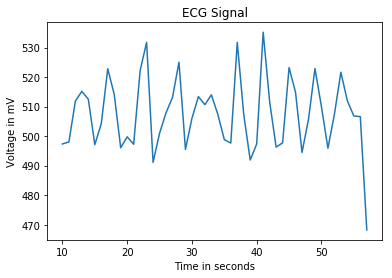

In [25]:
df=pd.read_csv("data/split.csv",header=None,date_parser=True)
df.columns=['time','value']
plt.title("ECG Signal")                 #The title of the plot
plt.xlabel('Time in seconds')           #x-axis lable
plt.ylabel('Voltage in mV')             #y-axis label
x=df.time                          #y variable contains the voltage
y=df.value
plt.plot(x,y)